Sample 1 Median: 412.3756
Sample 2 Median: 613.1424
Mann-Whitney U : 3267.0
P < 0.05


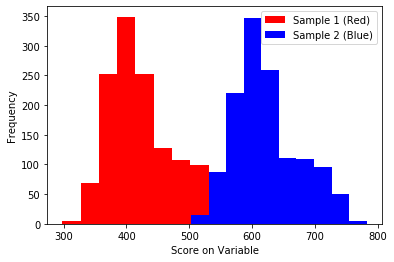

In [20]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

# generating the data

sample1 = []


for i in range(1000):
    sample1.append(30*np.random.randn()+400)
    
for i in range(300):
    sample1.append(30*np.random.randn()+500)

    
sample2 = []


for i in range(1000):
    sample2.append(30*np.random.randn()+600)
    
for i in range(300):
    sample2.append(30*np.random.randn()+700)
    
    
# performing the Mann-Whitney U test using scipy.stats   
    
U = scipy.stats.mannwhitneyu(sample1,sample2)

print('Sample 1 Median:', round(statistics.median(sample1),4))
print('Sample 2 Median:', round(statistics.median(sample2),4))

print('Mann-Whitney U :', U[0])

if U[1] <= 0.05:
    print('P < 0.05')

# plotting the data

plt.hist(sample1, color = 'red')
plt.hist(sample2, color = 'blue')
plt.xlabel('Score on Variable')
plt.ylabel('Frequency')
plt.legend(['Sample 1 (Red)', 'Sample 2 (Blue)'])
plt.show()